**1. Load the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

**2. Read in the data**

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
print(f'Training data has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'Test data has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

Training data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
F_desc = open('../data/data_description.txt')
print(F_desc.read())
F_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**3. Percentage of missing values**

In [8]:
df_null = pd.DataFrame(columns=['Features', 'null_percent'])
df_null['Features'] = df_train.columns
df_null['null_percent'] = np.round((df_train.isnull().sum().values/df_train.shape[0])*100,3)
df_null.sort_values(by='null_percent', ascending=False)

,Features,null_percent
72,PoolQC,99.521
74,MiscFeature,96.301
6,Alley,93.767
73,Fence,80.753
25,MasVnrType,59.726
...,...,...
27,ExterQual,0.000
24,Exterior2nd,0.000
23,Exterior1st,0.000
22,RoofMatl,0.000


**Before dealing with the missing values, let us look at the data distribution.**

In [9]:
num_vars = list(df_train.select_dtypes(exclude= [object]).columns)
cat_vars = list(df_train.select_dtypes(include= [object]).columns)

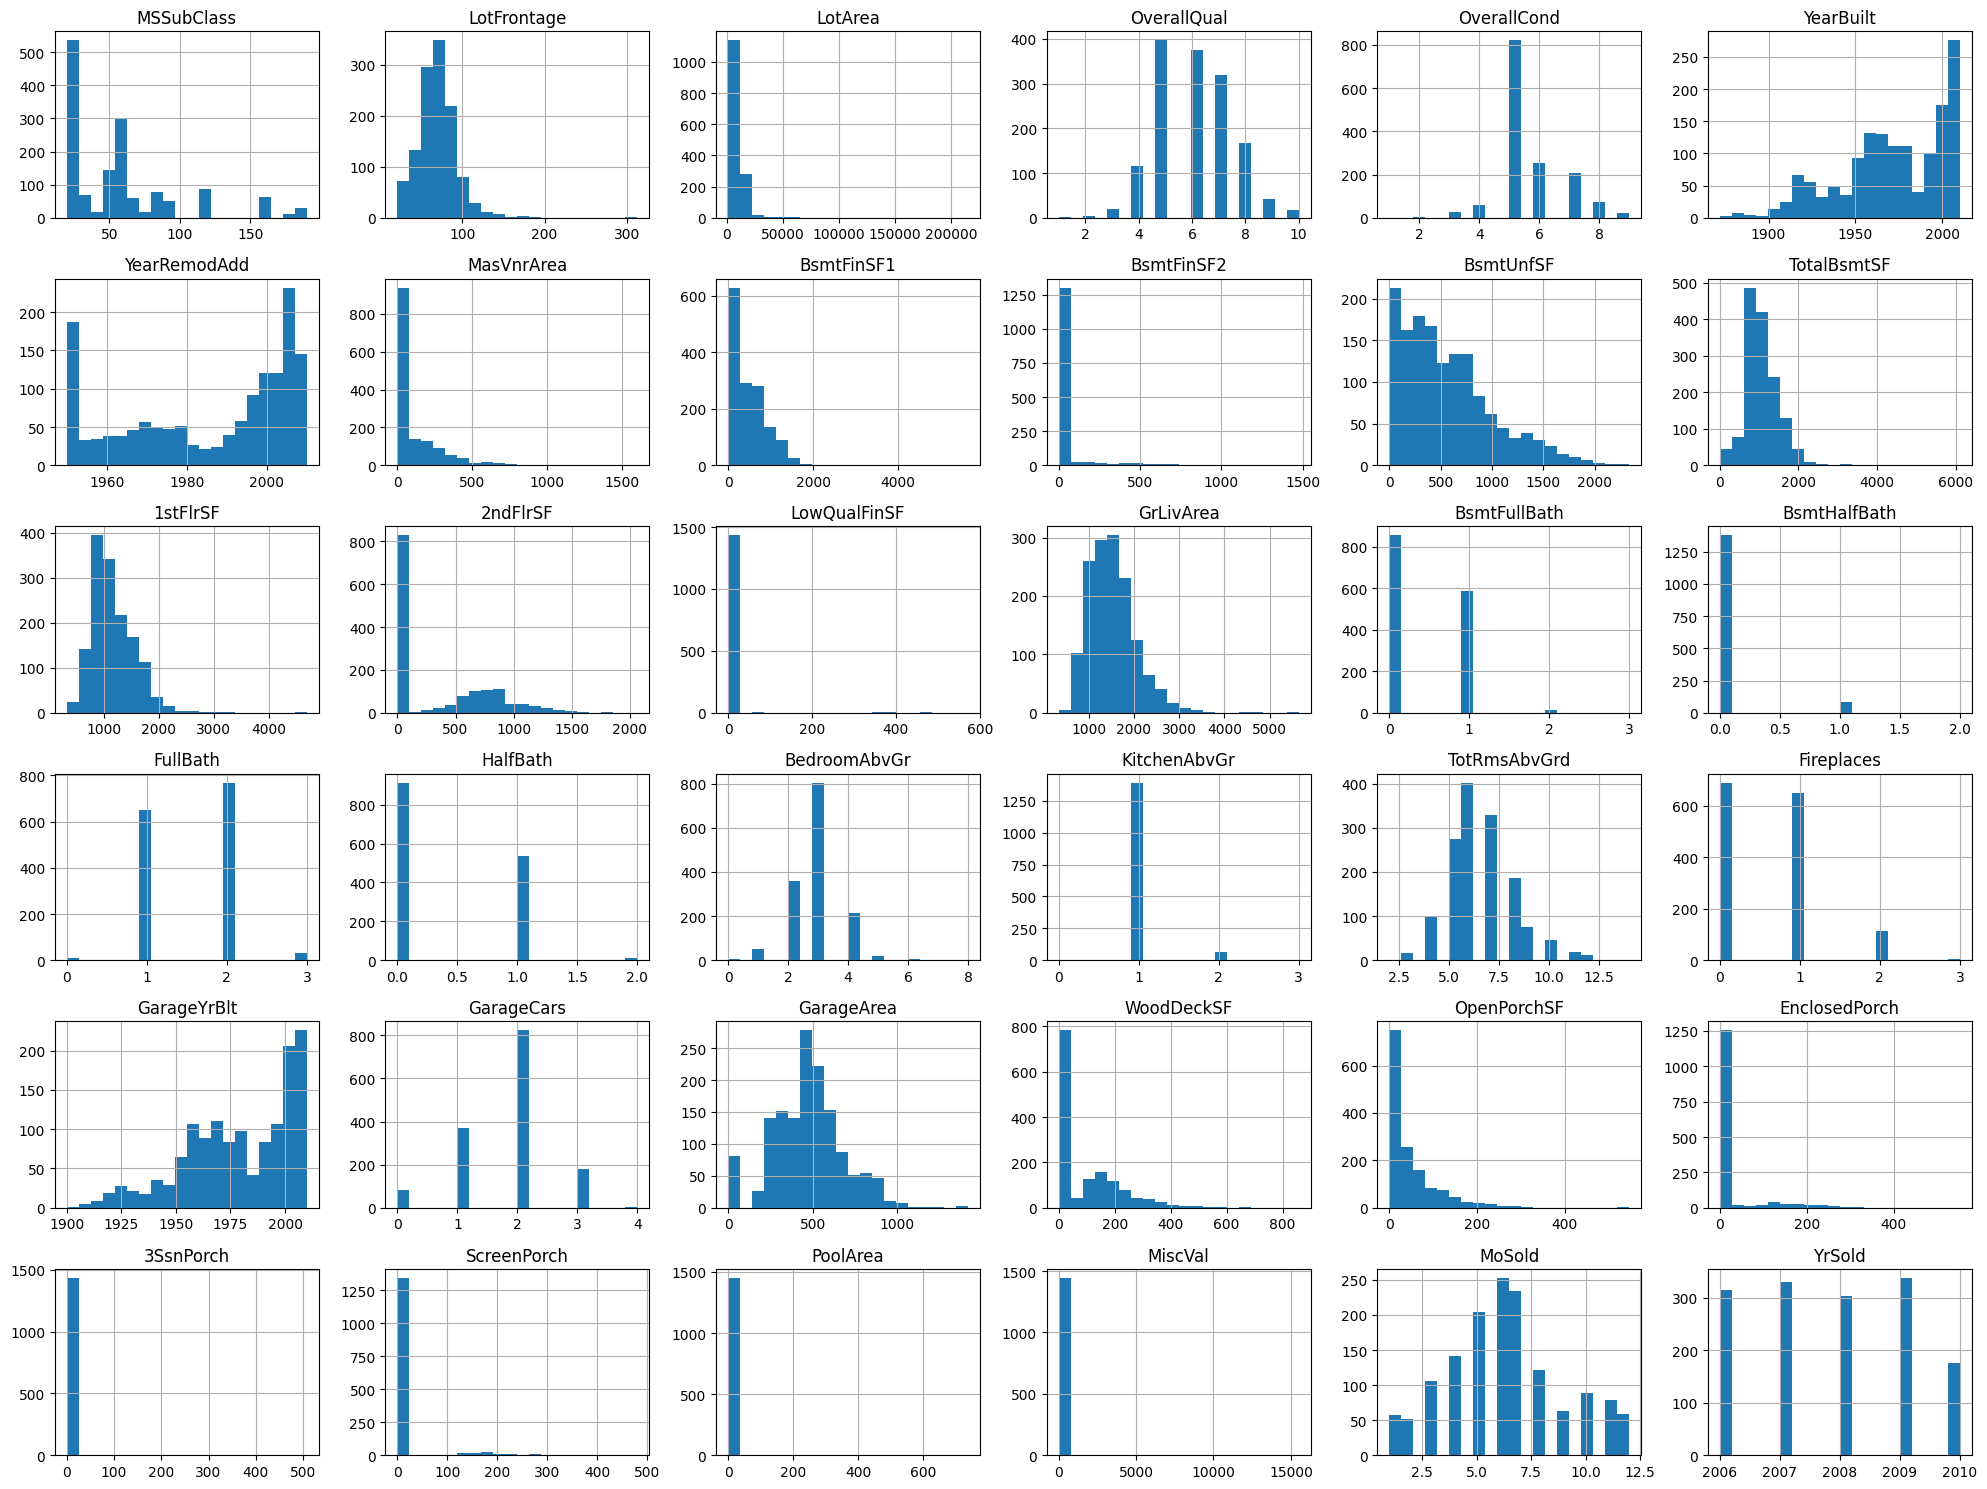

In [10]:

df_train[num_vars[1:-1]].hist(bins=20, figsize=(20, 15))
#plt.title('Distribution of numerical variables')
plt.tight_layout()
plt.show()

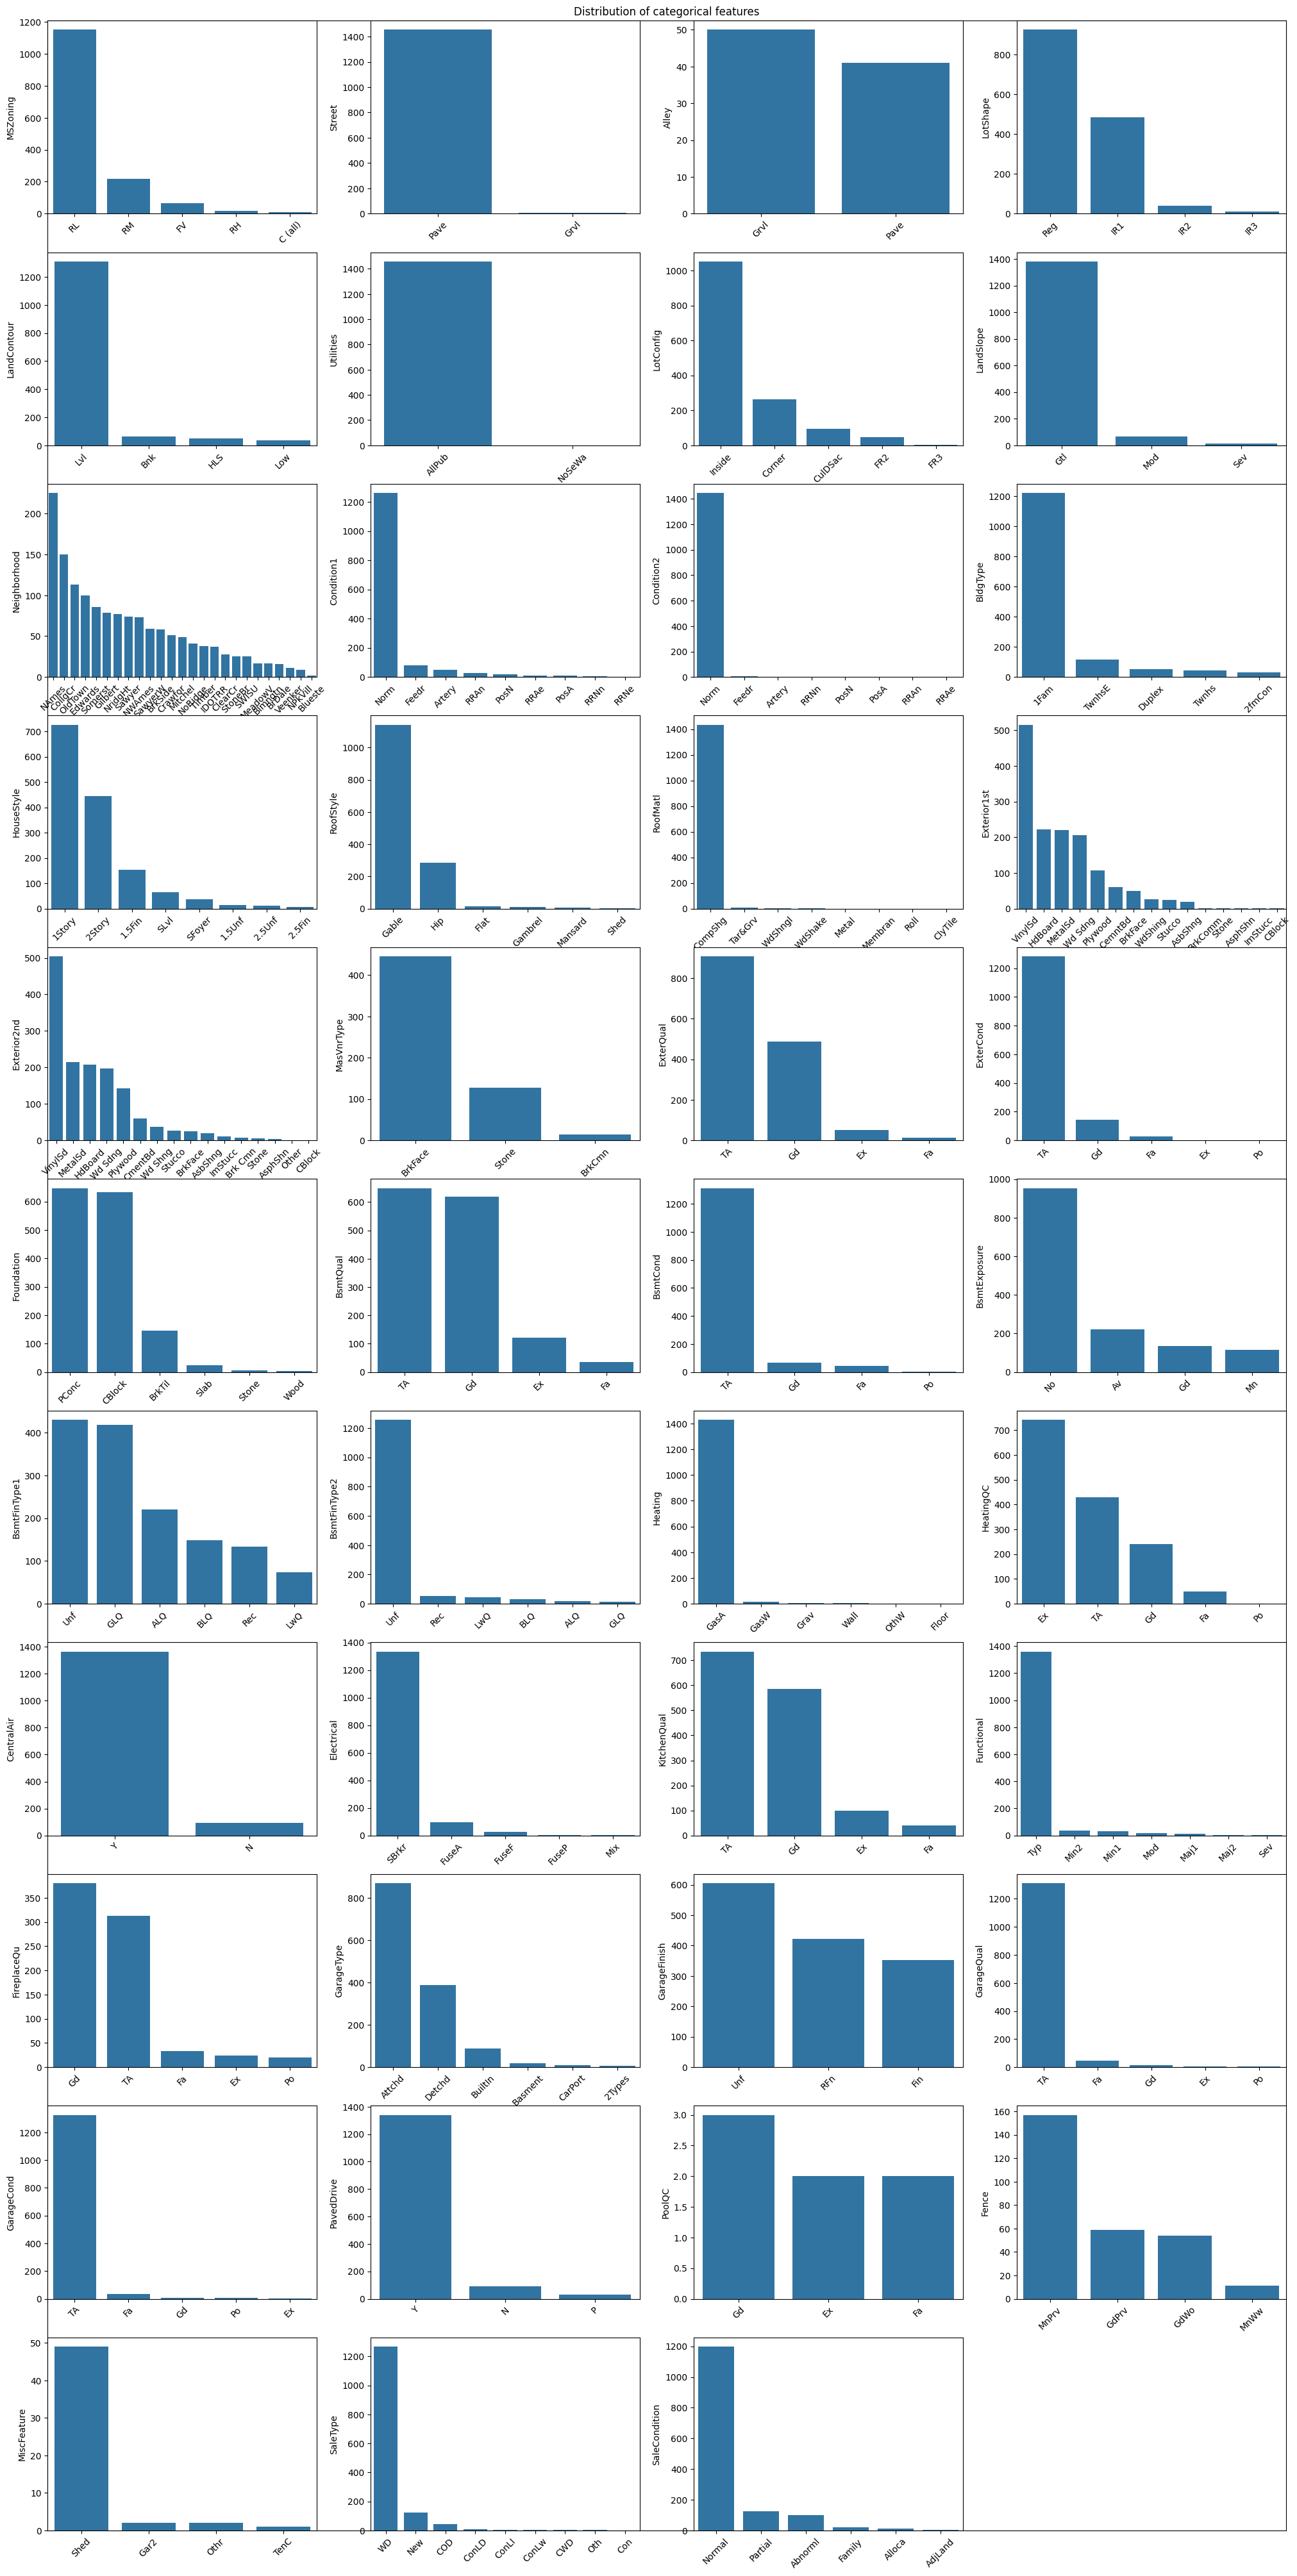

In [11]:
plt.figure(figsize= (20, 40))
plt.xticks(rotation=90)
plt.title('Distribution of categorical features')
plt.tight_layout()
plt.xticks([])
plt.yticks([])

index = 1
for var in cat_vars:
    df = df_train[var].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=45)
    plt.ylabel(var)  # Set the y-axis label to the column name
    sns.barplot(x=list(df.index), y=df)
    index += 1


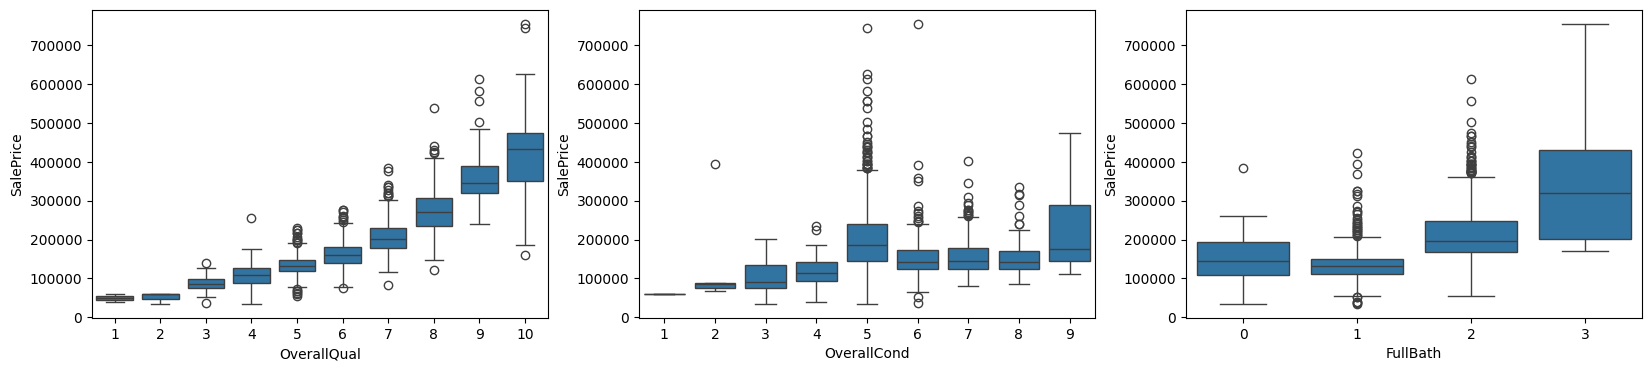

In [12]:
grade_cols = ['OverallQual', 'OverallCond', 'FullBath']
plt.figure(figsize=(20,4))
#plt.ylabel('SalePrice')
plt.tight_layout

index = 1
for col in grade_cols:
    plt.subplot(1,3,index)
    sns.boxplot(data=df_train, x=col, y='SalePrice')
    #plt.ylabel('')
    index += 1

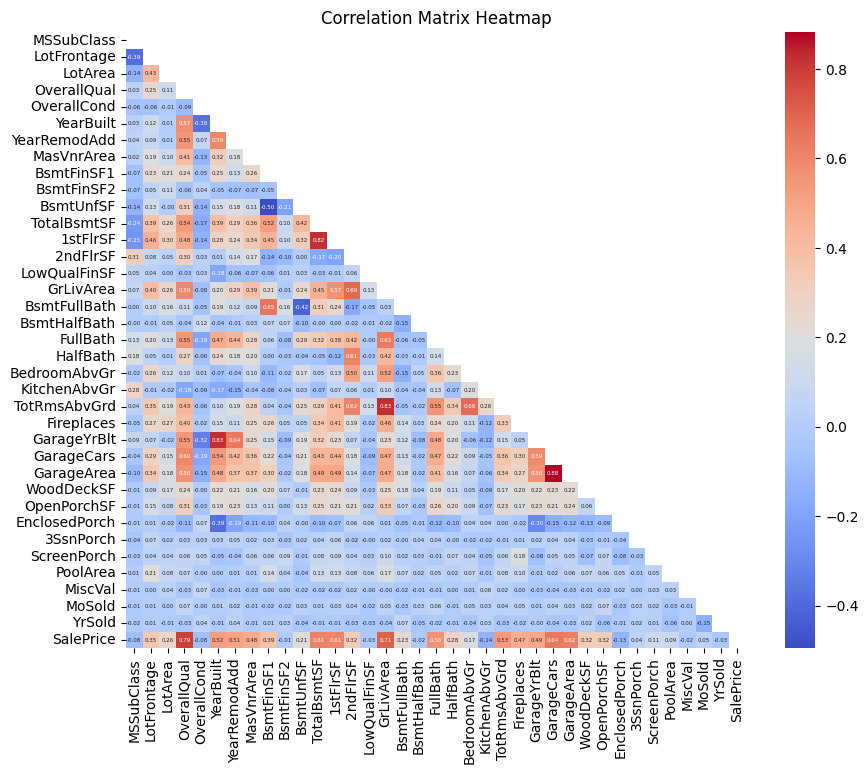

In [13]:
corr_matrix = df_train[num_vars[1:]].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, annot_kws={"size": 4})
plt.title('Correlation Matrix Heatmap')
plt.show()

**4. Data Preprocessing**
- Drop the columns Alley, Fence, MiscFeature.
- Drop 'Utilities' column as all the values but one have 'AllPub'.
- Basement features: fill the missing values with 0 or 'NA' as there is no basement for these houses.
- Garage features: fill the missing values with 0 or 'NA' as there is no garage for these houses.
- FirePlaceQu with NA have Fireplaces = 0, therefore, fill the missing values with 'NA'
- And fill the remaining numerical missing values with median and categorical values with mode.

In [14]:
#First make a copy of the predictors and target values
X = df_train.drop('SalePrice', axis=1)
Y = df_train['SalePrice'].copy()

In [15]:
#drop Id, Alley, Fence, MiscFeature and Utilities columns
columns_to_drop = ['Id', 'MiscFeature', 'Alley', 'Fence', 'Utilities']
X.drop(columns=columns_to_drop, inplace=True)

In [16]:
#Create pipelines for numerial and categorical variables
#Impute numerical variables
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'), 
                                     StandardScaler())

num_pipeline_0 = make_pipeline(SimpleImputer(strategy='constant', fill_value=int(0)), 
                               StandardScaler())

#Impute categorical variables
cat_na_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'),
                                OneHotEncoder(handle_unknown='ignore'))

default_cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                     OneHotEncoder(handle_unknown='ignore'))


In [17]:
#Variables to be processed through pipelines
num_vars = list(X.select_dtypes(exclude= [object]).columns)
cat_vars = list(X.select_dtypes(include= [object]).columns)

cat_vars_fill_with_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',
                         'GarageCond', 'GarageQual', 'FireplaceQu', 'PoolQC']

num_vars_fill_with_0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath','GarageCars', 
                        'GarageArea', 'GarageYrBlt']

other_cat_vars = [var for var in cat_vars if var not in cat_vars_fill_with_na]

other_num_vars = [var for var in num_vars if var not in num_vars_fill_with_0]

In [18]:
#Preprocessing pipeline 
preprocessing = ColumnTransformer([
    ('cat_na', cat_na_pipeline, cat_vars_fill_with_na),
    ('cat', default_cat_pipeline, other_cat_vars),
    ('num_0', num_pipeline_0, num_vars_fill_with_0),
    ('num', default_num_pipeline, other_num_vars)
])

**5. Model training, Selection and Prediction**

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#split training set into training and valiation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [20]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_valid)
print(f'MAE: {mean_absolute_error(Y_valid, Y_pred)}')


MAE: 18431.430447145995


In [21]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

RF_reg = make_pipeline(preprocessing, RandomForestRegressor())
RF_reg.fit(X_train, Y_train)
Y_pred = RF_reg.predict(X_valid)
print(f'MAE: {mean_absolute_error(Y_valid, Y_pred)}')


MAE: 17749.06886986301


In [22]:
#XGBRegressor model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


XG_reg = make_pipeline(preprocessing, XGBRegressor())
XG_reg.fit(X_train, Y_train)
Y_pred = XG_reg.predict(X_valid)
print(f'MAE: {mean_absolute_error(Y_valid, Y_pred)}')



MAE: 16655.489311322774


In [23]:
#XGBRegressor model with CV

XG_reg = make_pipeline(preprocessing, XGBRegressor())
XG_cv_scores = -cross_val_score(XG_reg, X, Y, scoring='neg_mean_absolute_error', cv=5)

# Print the cross-validation scores
pd.Series(XG_cv_scores).describe()

count        5.000000
mean     17636.470914
std       1458.747014
min      15725.431239
25%      16834.611288
50%      17832.766749
75%      18183.597094
max      19605.948202
dtype: float64

In [24]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('xgb', XGBRegressor()),
])

param_grid = {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__learning_rate': [0.03, 0.1, 0.3],
    'xgb__max_depth': [3, 4, 5, 6,7],
    
}

grid_search = GridSearchCV(full_pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
grid_search.fit(X_train, Y_train)

train_mae = -grid_search.best_score_
Y_pred = grid_search.predict(X_valid)
val_mae = mean_absolute_error(Y_pred, Y_valid)
print(f'Best score: {train_mae}')
print(f'MAE Validation set: {val_mae}')


Best score: 15664.335119825482
MAE Validation set: 15305.277250107021


In [32]:
#Final model
final_model = grid_search.best_estimator_

# Save the model to a file
import pickle
with open('../models/final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

**6. Prediction on test data**

In [26]:
#Drop the columns from test data that were dropped in training data
X_test = df_test.drop(columns=columns_to_drop)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,120,0,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,...,0,0,0,0,NaN,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,...,0,0,144,0,NaN,0,1,2010,WD,Normal


In [27]:
#Predict the saleprice using the final model
Y_test_pred = final_model.predict(X_test)

In [28]:
test_pred = pd.DataFrame({'Id': df_test['Id'],
                          'SalePrice': Y_test_pred.tolist()})

In [29]:
test_pred.head()

,Id,SalePrice
0,1461,127939.460938
1,1462,171376.062500
2,1463,173823.078125
3,1464,192141.468750
4,1465,187644.875000


In [30]:
test_pred.tail()

,Id,SalePrice
1454,2915,82246.328125
1455,2916,78170.062500
1456,2917,158075.062500
1457,2918,123400.132812
1458,2919,218553.328125


In [31]:
test_pred.to_csv('../results/Predicted_prices.csv', index=False)